# Tasca dades, probabilitats i estadístiques

## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/itacademy-rogergallart/sampling/main/laliga1995-2000.csv',
                 dtype={'HTHG':'Int64','HTAG':'Int64'}, index_col=0)
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2,0,H,False
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3,0,H,False
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2,0,H,False
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1,1,D,True
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0,0,D,False


In [3]:
# Creem 3 noves columnes:
# Goals_1H:  Goals first half (nombre total de gols marcats a la primera part pels dos equips)
# Goals_2H:  Goals second half (nombre total de gols marcats a la segons part pels dos equips)
# Goals: Total goals in the game (nombre de gols totals del partit fets pels dos equips)

df['Goals_1H'] = df.HTHG + df.HTAG
df['Goals'] = df.FTHG + df.FTAG
df['Goals_2H'] = df.Goals - df.Goals_1H

df = df[['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 
         'HTHG','HTAG', 'HTR', 'Top5Budget', 'Goals','Goals_1H', 'Goals_2H']]

df.dropna(axis=0, how='any', inplace=True)
df.to_csv('laliga1995-2000_v2.csv')

df.sample(5)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget,Goals,Goals_1H,Goals_2H
2540,2001-02,28/10/01,Ath Bilbao,Espanol,1,1,D,1,0,H,False,2,1,1
7492,2014-15,9/11/2014,Sociedad,Ath Madrid,2,1,H,1,1,D,False,3,2,1
8021,2015-16,28/02/16,La Coruna,Granada,0,1,A,0,1,A,False,1,1,0
9237,2018-19,24/04/2019,Ath Madrid,Valencia,3,2,H,1,1,D,True,5,2,3
5787,2009-10,10/4/2010,Villarreal,Sp Gijon,1,0,H,1,0,H,False,1,1,0


In [4]:
# Seleccionem la columna de gols totals de cada partit (Goals)

from statistics import mode, median, stdev, mean

print(f'La moda de la variable Goals és: {mode(df.Goals)}')
print(f'La mediana de la variable Goals és: {median(df.Goals):.2f}')
print(f'La desviació estàndard de la variable Goals és: {stdev(df.Goals):.2f}')
print(f'La mitjana aritmètica de la variable Goals és: {mean(df.Goals):.2f}')


La moda de la variable Goals és: 2
La mediana de la variable Goals és: 3.00
La desviació estàndard de la variable Goals és: 1.69
La mitjana aritmètica de la variable Goals és: 2.69


## Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [9]:
# Calculem el coefficient de correlació (Person) entre el nombre de gols marcats durant la
# primera part del partit (Goals_1H) i els marcats durant la segona part (Goals_2H)
from scipy.stats import pearsonr

corr, _ = pearsonr(df.Goals_1H, df.Goals_2H)
print(f'El coefficient de correlació entre el nombre de gols marcats',
      f'a la primera part d\'un partir (Goals_1H) i el nombre de gols marcats',
      f'a la segona part és: {corr:.4f}')

El coefficient de correlació entre el nombre de gols marcats a la primera part d'un partir (Goals_1H) i el nombre de gols marcats a la segona part és: 0.0694


## Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

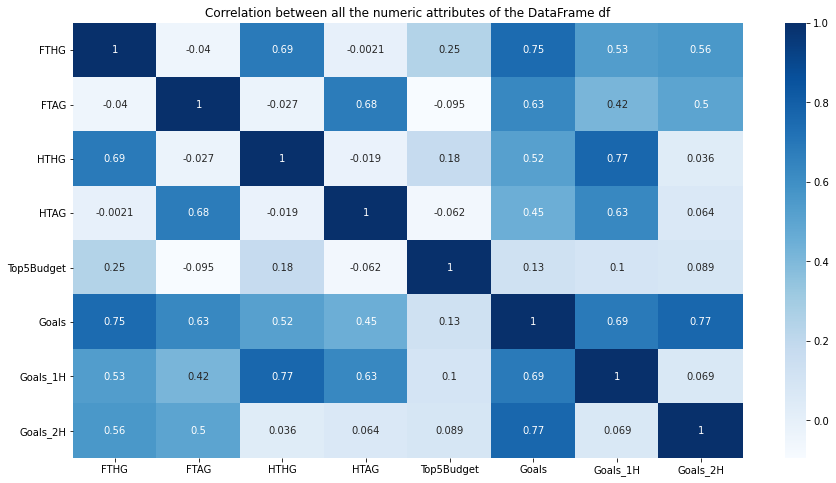

In [11]:
# Correlació entre tots els atributs (numèrics)
corr = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="Blues", )

plt.title('Correlation between all the numeric attributes of the DataFrame df');

# Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

La mitjana geomètrica i la mitjana harmònica no són mètriques adecuades si hi ha valors nuls (o negatius). L'atribut nombre de gols de cada partit conté bastants zeros, ja que hi ha molts partits on algun dels dos equips (o tots dos) no marca cap gol (resultat: 0-0).

Per fer aquest exercici, creem una nova variable que és el nombre total de gols marcats per cada equip a cada temporada. Aquest atribut no conté cap valor nul (no hi ha cap equip de primera divisió que acabi la temporada sense haver marcat al menys un gol).

In [12]:
# Creem un nou dataframe dfGoalsBySeason
foo1 = df[['Season','Date','HomeTeam','FTHG']].copy()
foo1.rename(columns={'HomeTeam':'Team', 'FTHG':'Goals'}, inplace=True)

foo2 = df[['Season','Date','AwayTeam','FTAG']].copy()
foo2.rename(columns={'AwayTeam':'Team', 'FTAG':'Goals'}, inplace=True)

dfGoalsBySeason = pd.concat([foo1,foo2]).groupby(['Season','Team']).sum().reset_index()
dfGoalsBySeason.head()

,Season,Team,Goals
0,1995-96,Albacete,55
1,1995-96,Ath Bilbao,43
2,1995-96,Ath Madrid,75
3,1995-96,Barcelona,72
4,1995-96,Betis,61


In [14]:
# Comprovem que l'atribut Goals de dfGoalsBySeason no té cap valor nul
print(f'Nombre d\'equips que no han marcat cap gol durant una temporada: {dfGoalsBySeason[dfGoalsBySeason.Goals==0].Goals.count()}')

Nombre d'equips que no han marcat cap gol durant una temporada: 0


In [15]:
# Calcul de la mitja geomètrica i harmònica dels gols per temporada
from scipy.stats import gmean, hmean

print(f'DataFrame: dfGoalsBySeason\nAtribut Goals: Nombre de gols fets per un equip durant tota la temporada\n')
print(f'La mitjana geomètrica de la variable Goals és: {gmean(dfGoalsBySeason.Goals):.3f}')
print(f'La mitjana harmònica de la variable Goals és: {hmean(dfGoalsBySeason.Goals):.3f}')


DataFrame: dfGoalsBySeason
Atribut Goals: Nombre de gols fets per un equip durant tota la temporada

La mitjana geomètrica de la variable Goals és: 49.322
La mitjana harmònica de la variable Goals és: 47.430
